In [96]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import time

In [97]:
 #helper function
 def win_or_lose(p, capital_list, i, outcome_seq):
    u = rd.uniform(0,1)
    curr_capital = capital_list[i-1]          
    if u <= p:
        capital_list[i] = curr_capital + 1
        outcome_seq += 'W'
    else:
        capital_list[i] = curr_capital - 1
        outcome_seq += 'L'
    return capital_list, outcome_seq

In [98]:
def game_a(capital, games,  outcome_seq, e = 0.003):
    #coin 1
    capital_list = [capital] + [0 for _ in range(games)]
    for i in range(1, games+1):
        curr_capital = capital_list[i-1]
        p_1 = 0.5 - e
        capital_list, outcome_seq = win_or_lose(p_1, capital_list, i, outcome_seq)
    return capital_list, outcome_seq

In [133]:
def game_b(capital, games, outcome_seq,  e = 0.003):
    if len(outcome_seq) < 2 and games == 1:
        #seed 1 game
        outcome_seq += rd.choice(['W','L'])
        if outcome_seq[-1] == "W":
            capital += 1
        else:
            capital -= 1
        return [0, capital], outcome_seq
    elif len(outcome_seq) == 0 and games >= 2:
        #this happens only when game B is simulated for more than or equal to 2 games
        #seed 2 games
        outcome_seq = rd.choice(['W','L']) + rd.choice(['W','L'])
        if outcome_seq == 'WW':
            capital_list = [0, 1, 2]
        elif outcome_seq == 'LL':
            capital_list = [0, -1, -2]
        elif outcome_seq == 'LW':
            capital_list = [0, -1, 0]
        else:
            capital_list = [0, 1, 0]
        games -= 2
        if games == 0:
            return capital_list, outcome_seq
        else:
            #continue with the rest of the sims for game B
            capital = capital_list[:]
    if len(outcome_seq) >= 2 and games >= 1:
        if type(capital) == list:
            capital_list = capital + [0 for _ in range(games)]
        else:
            capital_list = [capital] + [0 for _ in range(games)]
        for i in range(len([capital]), len(capital_list)):
            curr_capital = capital_list[i-1]
            most_recent_2_games = outcome_seq[-2:]
            if most_recent_2_games == 'LL':
                #coin B1
                p_2 = 0.9-e
                capital_list, outcome_seq = win_or_lose(p_2, capital_list, i, outcome_seq)
            elif most_recent_2_games == 'LW' or most_recent_2_games == 'WL':
                #coin B2 & B3
                p_3 = 0.25-e
                capital_list, outcome_seq = win_or_lose(p_3, capital_list, i, outcome_seq)
            else:
                #coin B4
                p_4 = 0.7-e
                capital_list, outcome_seq = win_or_lose(p_4, capital_list, i, outcome_seq)
        return capital_list, outcome_seq

In [100]:
def sim_game_a(games = 100, trials = 500000):
    capital_list = np.zeros((trials, games+1))
    for j in tqdm(range(trials)):
        curr_capital, outcome_seq = game_a(0, games, '')
        capital_list[j, :] = np.array(curr_capital)
    mean_capital_list = np.mean(capital_list, axis=0)
    return mean_capital_list

In [129]:
def sim_game_b(games = 100, trials = 500000):
    capital_list = np.zeros((trials, games+1))
    for j in tqdm(range(trials)):
        curr_capital, outcome_seq = game_b(0, games, '')
        capital_list[j, :] = np.array(curr_capital)
    mean_capital_list = np.mean(capital_list, axis=0)
    return mean_capital_list

In [115]:
def sim_rand_a_b(games = 100, trials = 500000):
    capital_list = np.zeros((trials, games+1))
    for j in tqdm(range(trials)):
        outcome_seq = ''
        for k in range(1,games+1):
            curr_cap = capital_list[j, k-1]
            choice = rd.choice(['a', 'b'])
            if choice == 'a':
                #play game a
                curr_capital, outcome_seq = game_a(curr_cap, 1, outcome_seq)
                capital_list[j, k] = curr_capital[-1]
            else:
                #play game b
                curr_capital, outcome_seq = game_b(curr_cap, 1, outcome_seq)
                capital_list[j, k] = curr_capital[-1]         
    mean_capital_list = np.mean(capital_list, axis=0)
    return mean_capital_list

In [124]:
def sim_AABB(games = 100, trials = 500000):
    sequence = 'AABB'*25
    capital_list = np.zeros((trials, games+1))
    for j in tqdm(range(trials)):
        outcome_seq = ''
        for k in range(1, games+1):
            curr_cap = capital_list[j, k-1]
            if sequence[k-1] == 'A':
                curr_capital, outcome_seq = game_a(curr_cap, 1, outcome_seq)
                capital_list[j, k] = curr_capital[-1]
            else:
                curr_capital, outcome_seq = game_b(curr_cap, 1, outcome_seq)
                capital_list[j, k] = curr_capital[-1]
    mean_capital_list = np.mean(capital_list, axis=0)
    return mean_capital_list 

In [104]:
# game_a_results = np.array(sim_game_a())
# game_b_results = np.array(sim_game_b())
# game_rand_results = np.array(sim_rand_a_b())
# game_AABB_results = np.array(sim_AABB())
x_axis = np.arange(0,101)

100%|██████████| 500000/500000 [01:10<00:00, 7104.11it/s]


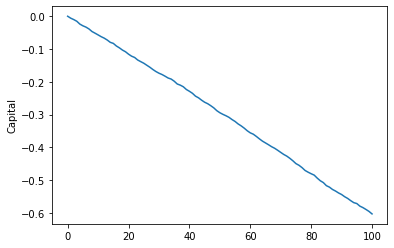

In [105]:
game_a_results = np.array(sim_game_a())
plt.plot(x_axis, game_a_results)
plt.ylabel('Capital')
plt.show()

100%|██████████| 500000/500000 [01:28<00:00, 5659.60it/s]


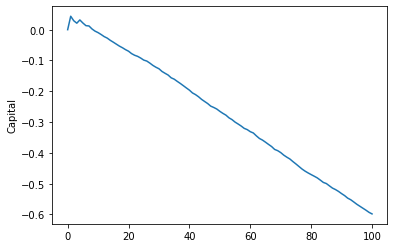

In [134]:
game_b_results = np.array(sim_game_b())
plt.plot(x_axis, game_b_results)
plt.ylabel('Capital')
plt.show()

100%|██████████| 500000/500000 [06:02<00:00, 1378.79it/s]


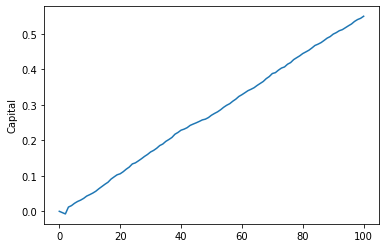

In [121]:
game_rand_results = np.array(sim_rand_a_b())
plt.plot(x_axis, game_rand_results)
plt.ylabel('Capital')
plt.show()

100%|██████████| 500000/500000 [04:22<00:00, 1906.64it/s]


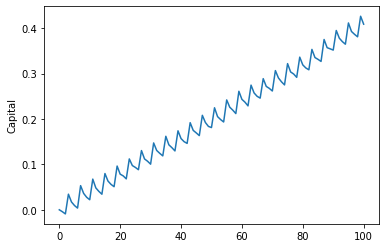

In [125]:
game_AABB_results = np.array(sim_AABB())
plt.plot(x_axis, game_AABB_results)
plt.ylabel('Capital')
plt.show()

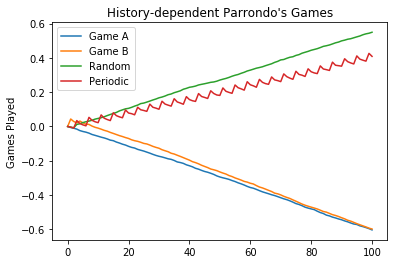

In [136]:
plt.plot(x_axis, game_a_results, label = 'Game A')
plt.plot(x_axis, game_b_results, label = 'Game B')
plt.plot(x_axis, game_rand_results, label = 'Random')
plt.plot(x_axis, game_AABB_results, label = 'Periodic')
plt.ylabel('Capital')
plt.ylabel('Games Played')
plt.title("History-dependent Parrondo's Games")
plt.legend()
plt.show()